In [1]:
import networkx as nx
from networkx.readwrite.gml import write_gml, read_gml
from networkx.readwrite.graphml import write_graphml, read_graphml
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import lukes_partitioning
import json
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def create_network(year):
    #Load data set
    with open(f"data/courses_{year}.json","r") as f:
        courses = json.load(f)
    #Build network    
    
    G = nx.Graph(year=year)
    for c in courses:
        if c["grade"]>0:
            G.add_node(f'{c["faculty"]["code"]}_{c["code"]}',name=c["name"],
                       faculty_name=c["faculty"]["name"],faculty_type=c["faculty"]["type"],
                       candidates=c["candidates"],accepted=c["Accepted"],vagas=c["vagas"],grade=c["grade"])
    for c in courses:
        for code in c["edges"].keys():
            G.add_edge(f'{c["faculty"]["code"]}_{c["code"]}',code,weight = c["edges"][code],weight_1 = 1/c["edges"][code])
    #Drop isolates
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

In [16]:
def export_network(G):
    if year := G.graph["year"]:
        write_graphml(G,f"networks/graph_{year}.graphml")

In [17]:
G = create_network(2021)
export_network(G)

In [16]:
comp = girvan_newman(G,lambda x: max(nx.edge_betweenness_centrality(x, weight='weight')))
tuple(c for c in next(comp))

KeyboardInterrupt: 

In [17]:
for c in communities:
    print(len(c))

1064
1


In [21]:
list(nx.bridges(G))

[('1202_9803', '3042_L175')]

In [41]:
a = nx.betweenness_centrality(G, weight='weight')

In [42]:
G.nodes[max(a,key=a.get)],a[max(a,key=a.get)]

({'candidates': 2377,
  'faculty_name': 'Universidade de Coimbra: Faculdade de Direito',
  'faculty_type': 'universidade',
  'name': 'Direito'},
 0.007195738855040254)

In [36]:
a[max(a)]

0.00043731029501939856

Text(0, 0.5, 'Frequency')

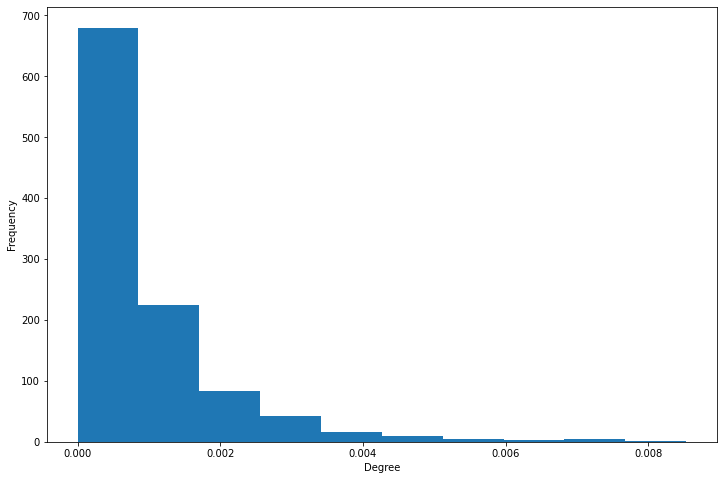

In [37]:
degree_freq = [G.degree(n,weight='weight') for n in G.nodes()]
# print(degree_freq)
degree_freq = [x/sum(degree_freq) for x in degree_freq]
degree_cum = [sum(degree_freq[i:]) for i in range(len(degree_freq))]
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
# plt.loglog(degrees[3:], degree_cum[3:],'o', markersize=1) 
plt.hist(degree_freq)
plt.xlabel('Degree')
plt.ylabel('Frequency')

11295


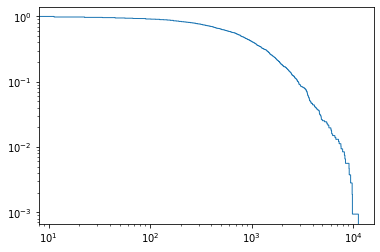

In [74]:
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
print(max(degrees))
# degrees = [n/sum(degrees) for n in degrees]
# degrees = np.histogram(degrees,bins = 100)
plt.xscale('log')
plt.hist(degrees,bins=1000,log=True,cumulative=-1,density=True, histtype='step')
plt.show()

In [10]:
nx.algorithms.assortativity.degree_assortativity_coefficient(G,weight='weight')


0.11793736373317022

In [11]:
nx.algorithms.assortativity.attribute_assortativity_coefficient(G,'candidates')

-0.0008938425698610988

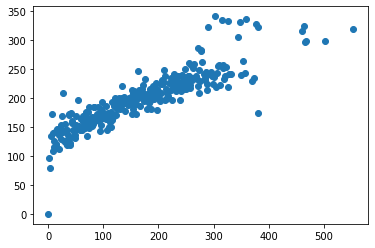

In [29]:
a = nx.algorithms.assortativity.average_degree_connectivity(G,weight='weight')
plt.plot(a.keys(),a.values(),'o')

In [23]:
a = [d['candidates'] for d in courses]
print(np.average([d['candidates'] for d in courses]), np.std(a))
print(min(a), max(a))

286.31775700934577 326.1137035277939
0 2394


In [17]:
degree_sequence = sorted([d for n, d in G.degree(weight='weight')], reverse=True) # used for degree distribution and powerlaw test

In [25]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 
fit.power_law.alpha

Calculating best minimal value for power law fit


3.834231388525514

<AxesSubplot:>

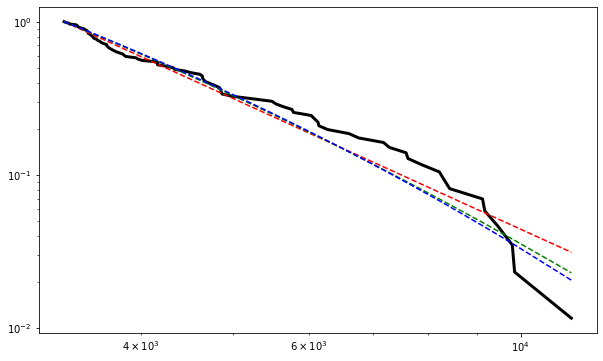

In [20]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential

In [67]:
from networkx.algorithms.community import greedy_modularity_communities

In [116]:
%%time
c = list(greedy_modularity_communities(G,weight='weight',resolution=2))
len(c)

CPU times: user 5.78 s, sys: 0 ns, total: 5.78 s
Wall time: 5.79 s


19

In [114]:
t = list(c[0])
[G.nodes[x]['name'] for x in t]

[285, 208, 188, 163, 85, 65, 39, 7, 6, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


['Engenharia Química',
 'Engenharia Biomédica e Biofísica',
 'Engenharia Automóvel',
 'Engenharia Informática',
 'Engenharia Eletrónica e Telecomunicações',
 'Engenharia Informática',
 'Gestão (ensino em Inglês)',
 'Engenharia Informática',
 'Engenharia Eletrotécnica',
 'Engenharia de Telecomunicações e Informática',
 'Matemática Aplicada',
 'Matemática Aplicada à Tecnologia e à Empresa',
 'Engenharia Eletrotécnica e de Computadores',
 'Informática de Gestão',
 'Engenharia Eletrotécnica e de Computadores',
 'Meteorologia, Oceanografia e Geofísica',
 'Engenharia Eletrotécnica e de Computadores',
 'Engenharia Física',
 'Ciência de Dados',
 'Engenharia Mecânica',
 'Engenharia Informática (regime pós-laboral)',
 'Engenharia Civil',
 'Matemática e Aplicações',
 'Matemática',
 'Engenharia Mecânica',
 'Economia (ensino em Inglês)',
 'Engenharia e Gestão Industrial',
 'Engenharia de Energias Renováveis',
 'Engenharia Física',
 'Engenharia Civil',
 'Engenharia Biomédica',
 'Engenharia Mecânica'

In [54]:
a = [x for x in G.edges() if G.edges[x]['weight'] > 50]
len(a)

2354

In [55]:
F = nx.Graph()
F.add_nodes_from(G.nodes())
F.add_edges_from(a)

In [59]:
%%time
comp = girvan_newman(F)
b = tuple(c for c in next(comp))

CPU times: user 1min, sys: 9.89 ms, total: 1min
Wall time: 1min


In [66]:
print([len(x) for x in b])

[1, 1, 302, 1, 1, 1, 1, 1, 342, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
F.edges[list(F.edges())[0]]

{}

In [64]:
list(F.edges())

[('0140_8086', '0602_9847'),
 ('0140_8086', '1110_9847'),
 ('0140_8086', '1201_9847'),
 ('0140_8086', '1509_9847'),
 ('0150_9219', '0150_9798'),
 ('0150_9219', '0150_9238'),
 ('0150_9219', '0150_9240'),
 ('0150_9219', '0201_9219'),
 ('0150_9219', '0507_9219'),
 ('0150_9219', '0604_9219'),
 ('0150_9219', '1202_9219'),
 ('0150_9798', '0150_9238'),
 ('0150_9798', '0150_9240'),
 ('0150_9238', '0150_9240'),
 ('0160_8083', '0400_9813'),
 ('0160_8083', '0506_9813'),
 ('0160_8083', '0506_9548'),
 ('0160_8083', '0901_9813'),
 ('0160_8083', '1000_9813'),
 ('0160_8083', '1108_9813'),
 ('0160_8083', '1110_9813'),
 ('0160_8083', '1113_9548'),
 ('0160_8083', '1309_8083'),
 ('0160_8083', '1507_9813'),
 ('0160_8083', '1508_9548'),
 ('0201_9821', '0201_9219'),
 ('0201_9821', '3081_9084'),
 ('0201_9834', '0201_9204'),
 ('0201_9834', '3081_9023'),
 ('0201_9219', '0204_9240'),
 ('0201_9219', '0300_9219'),
 ('0201_9219', '0400_9219'),
 ('0201_9219', '0507_9219'),
 ('0201_9219', '0604_9219'),
 ('0201_9219',